#### 1. Preparação e Carga


In [6]:
import pandas as pd
import json
import os

# Lista de caminhos baseada na sua estrutura de pastas real
caminhos_possiveis = [
    '../ia_novo.json',        # Volta uma pasta (se o notebook estiver em /notebooks)
    'ia_novo.json',           # Pasta atual
    '../data/ia_novo.json',   # Volta uma pasta e entra na /data
    'data/ia_novo.json'       # Entra na pasta /data a partir da atual
]

caminho_final = None

# Procura o arquivo nos locais acima
for caminho in caminhos_possiveis:
    if os.path.exists(caminho):
        caminho_final = caminho
        break

if caminho_final:
    try:
        with open(caminho_final, 'r', encoding='utf-8') as f:
            dados = json.load(f)
        
        # Cria a tabela
        df = pd.DataFrame([dados])
        print(f"✅ SUCESSO! Arquivo encontrado em: {caminho_final}")
        display(df)
    except Exception as e:
        print(f"❌ Erro ao ler o arquivo: {e}")
else:
    print("❌ ERRO: O arquivo 'ia_novo.json' não foi encontrado.")
    print("Verifique se o arquivo está na pasta 'Projeto-IA-Predicao'.")

✅ SUCESSO! Arquivo encontrado em: ../data/ia_novo.json


,titulo,extract
0,Inteligencia Artificial,A Inteligência Artificial (IA) é a inteligênci...


#### 2. Análise de Frequência

In [7]:
import re

# 1. Extraímos o texto da coluna 'extract' da sua tabela
texto_original = df['extract'].values[0]

# 2. Limpamos o texto: removemos pontuação e deixamos tudo em minúsculo
texto_limpo = re.sub(r'[^\w\s]', '', texto_original).lower()

# 3. Criamos a contagem de frequência
frequencia = pd.Series(texto_limpo.split()).value_counts()

print("✅ PASSO 2: As 10 palavras mais frequentes no seu texto:")
print(frequencia.head(10))

✅ PASSO 2: As 10 palavras mais frequentes no seu texto:
a               2
inteligência    2
artificial      1
ia              1
é               1
demonstrada     1
por             1
máquinas        1
Name: count, dtype: int64


#### 3. Nuvem de Palavras

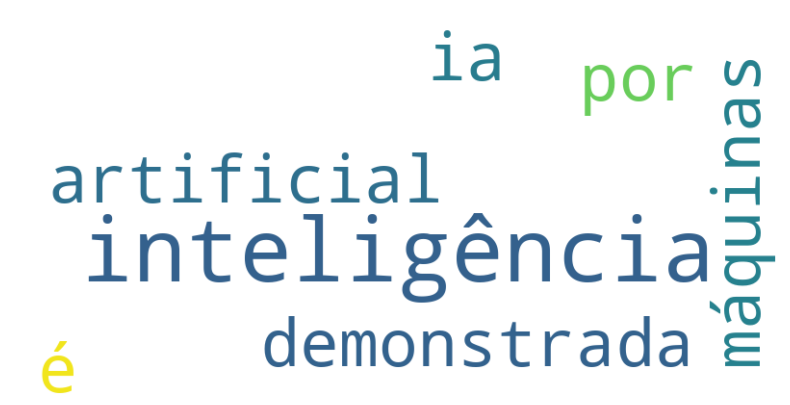

✅ PASSO 3: Nuvem de palavras gerada com sucesso!


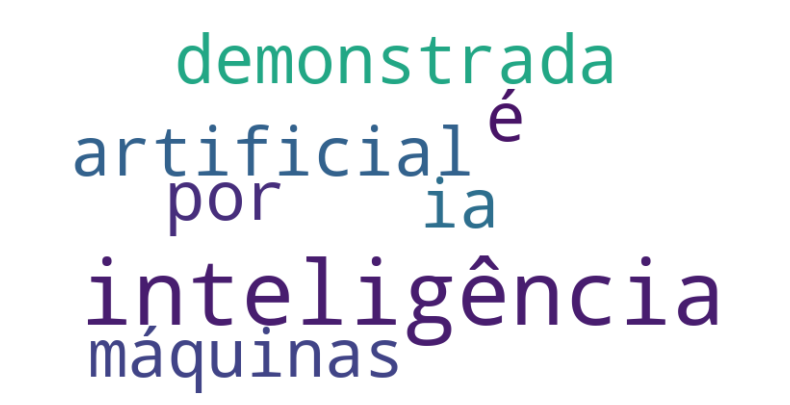

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Criando a nuvem de palavras com um visual moderno
nuvem = WordCloud(width=800, height=400, 
                  background_color='white', 
                  colormap='viridis').generate(texto_limpo)

# Exibindo o gráfico final
plt.figure(figsize=(10, 5))
plt.imshow(nuvem, interpolation='bilinear')
plt.axis('off') # Remove as bordas com números
plt.show()

print("✅ PASSO 3: Nuvem de palavras gerada com sucesso!")

# ... (seu código anterior da célula 3)

# Gerando a nuvem de palavras
nuvem = WordCloud(width=800, height=400, background_color='white').generate(texto_limpo)

# --- LINHA NOVA PARA SALVAR ---
nuvem.to_file("nuvem_resultado.png")
# ------------------------------

plt.figure(figsize=(10, 5))
plt.imshow(nuvem, interpolation='bilinear')
plt.axis('off')
plt.show()


#### 4. Gráfico de Barras das Top 10 Palavras

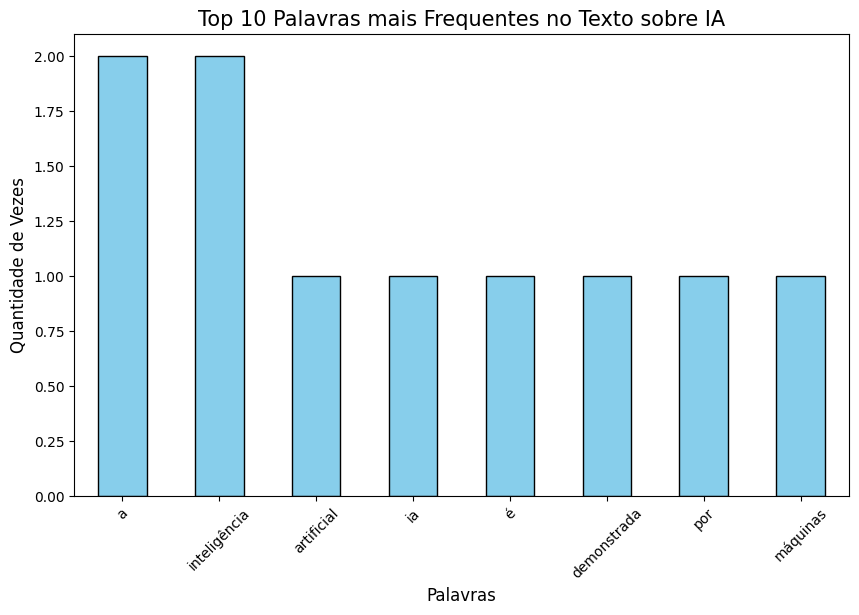

✅ PASSO 4: Gráfico de barras gerado e salvo como 'grafico_frequencia.png'!


In [10]:
# Criando o gráfico das 10 palavras mais frequentes
top_10 = frequencia.head(10)

# Definindo as cores e o tamanho
plt.figure(figsize=(10, 6))
top_10.plot(kind='bar', color='skyblue', edgecolor='black')

# Adicionando títulos e rótulos
plt.title('Top 10 Palavras mais Frequentes no Texto sobre IA', fontsize=15)
plt.xlabel('Palavras', fontsize=12)
plt.ylabel('Quantidade de Vezes', fontsize=12)
plt.xticks(rotation=45) # Inclina as palavras para facilitar a leitura

# Salvando também este gráfico como imagem
plt.savefig("grafico_frequencia.png")

plt.show()
print("✅ PASSO 4: Gráfico de barras gerado e salvo como 'grafico_frequencia.png'!")